##Data Preprocessing

###Importing Libraries

In [29]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf

###Data Preprocessing

In [4]:
dataset = pd.read_csv('/Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [5]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [6]:
print(y)


[1 0 1 ... 1 1 0]


### Encoding Categorical Data

Label Encoding the "Gender" column

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [8]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


One Hot Encoding the "Geography" column

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [10]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


### Splitting the dataset into Training set and Test set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

###Feature Scalinhg

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Buliding ANN Model

### Initializing the ANN

In [15]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [16]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [17]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [18]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### Training the ANN

### Compiling the ANN

In [19]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [20]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5453 - accuracy: 0.7716
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4483 - accuracy: 0.7983
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4361 - accuracy: 0.7994
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4301 - accuracy: 0.8030
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4250 - accuracy: 0.8050
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4208 - accuracy: 0.8084
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4169 - accuracy: 0.8104
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4129 - accuracy: 0.8142
Epoch 9/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4086 - accuracy: 0.8207
Epoch 10/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4043 - accura

## Making the predictions and evaluating the model

### Predicting the result of a single observation

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: $ 60000

Number of Products: 2

Does this customer have a credit card? Yes

Is this customer an Active Member: Yes

Estimated Salary: $ 50000

In [25]:
print(ann.predict(sc.transform([[1, 0, 0, 800, 1, 40, 3, 60000, 2, 1, 1, 70000]])) > 0.5)

1/1 [==============================] - 0s 75ms/step
[[ True]]


In [26]:
ann.evaluate(X_test, y_test)

63/63 [==============================] - 1s 7ms/step - loss: 0.3321 - accuracy: 0.8625


[0.3320621848106384, 0.862500011920929]

### Predicting the Test set results

In [27]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 0s 2ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Making the Confusion Matrix and Classification Report

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1517   78]
 [ 197  208]]


0.8625

Text(33.22222222222222, 0.5, 'Truth')

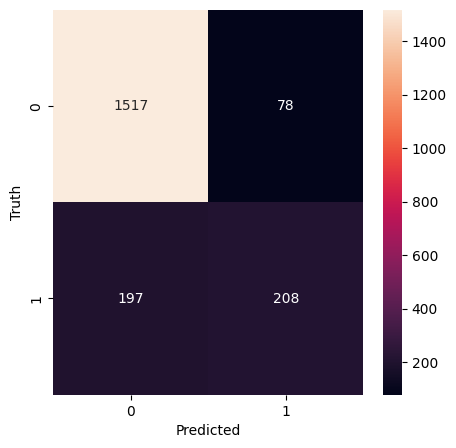

In [32]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (5,5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1595
           1       0.73      0.51      0.60       405

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000

